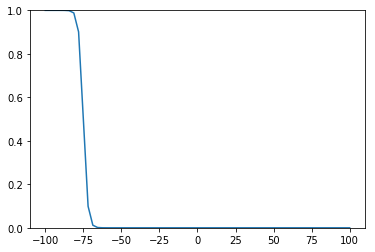

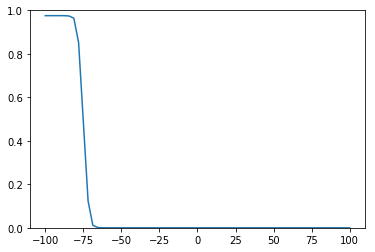

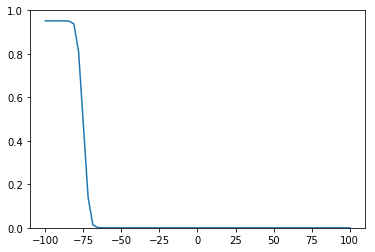

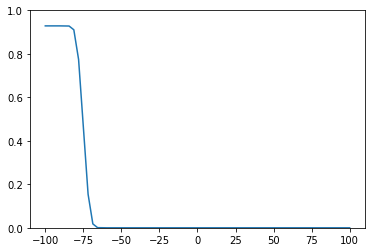

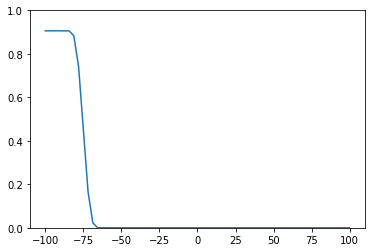

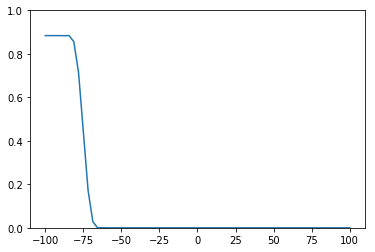

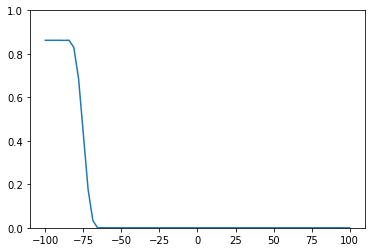

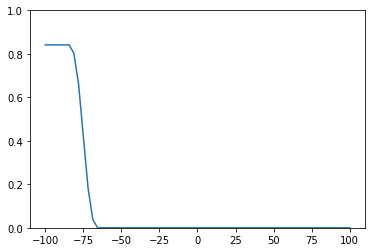

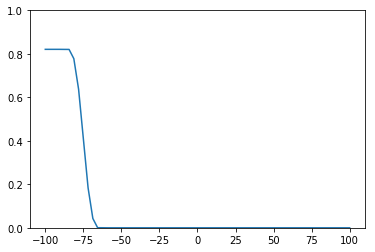

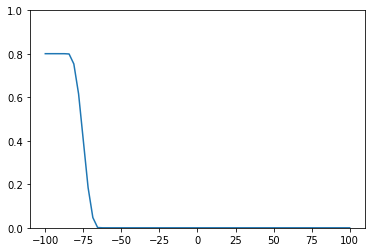

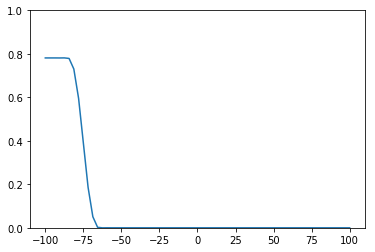

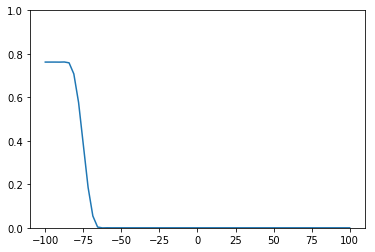

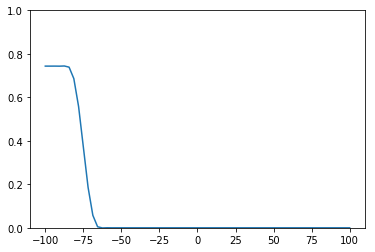

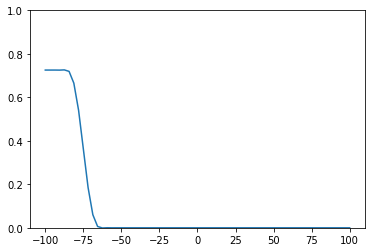

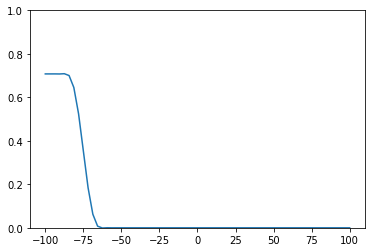

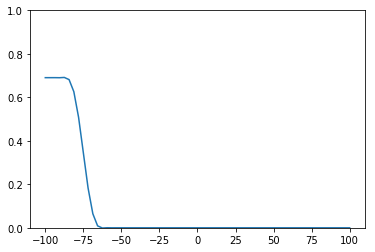

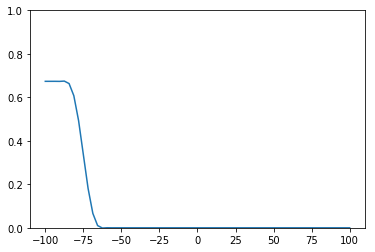

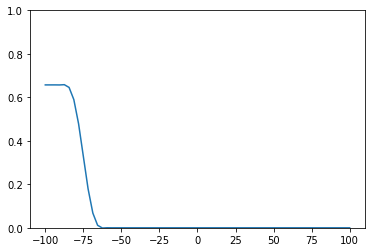

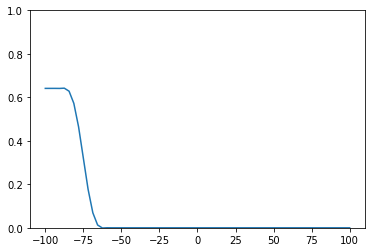

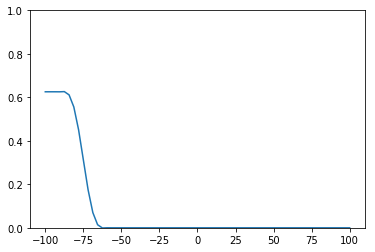

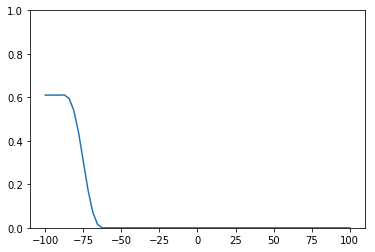

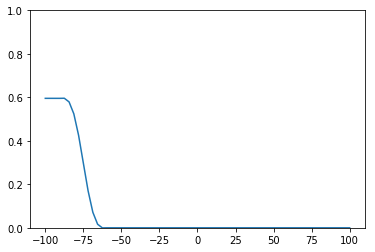

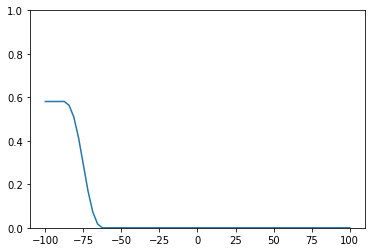

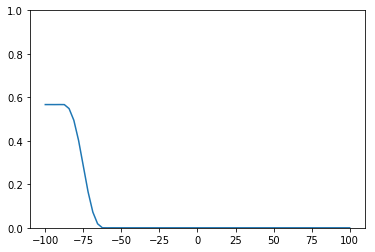

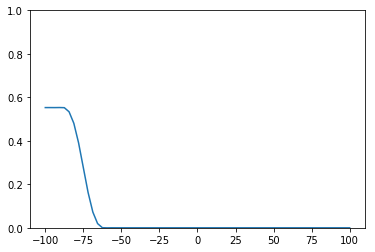

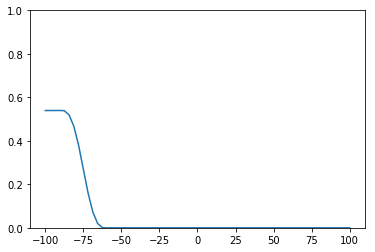

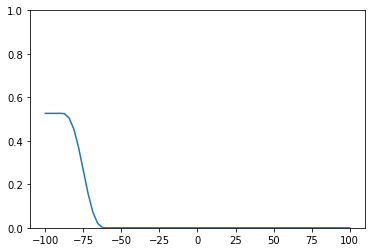

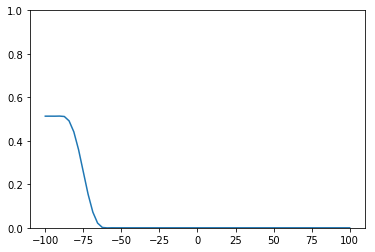

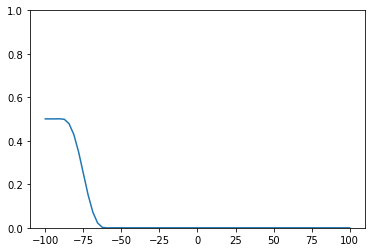

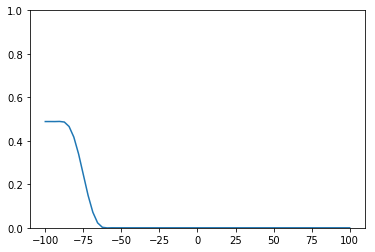

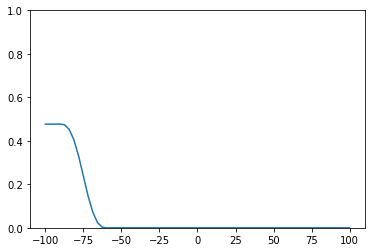

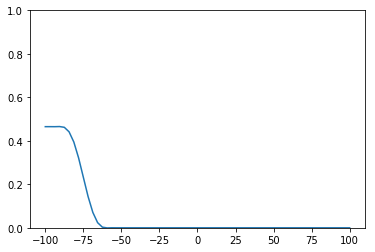

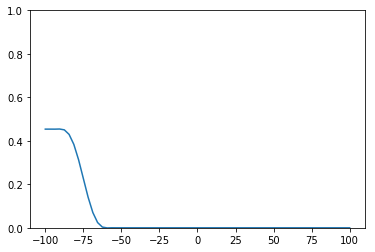

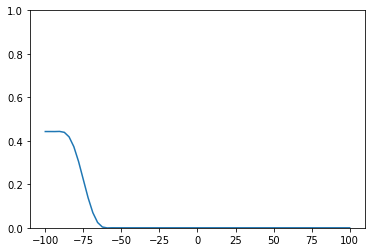

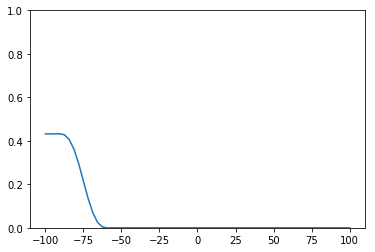

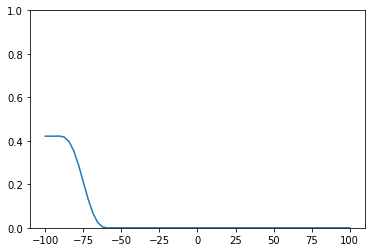

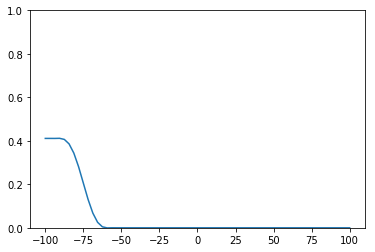

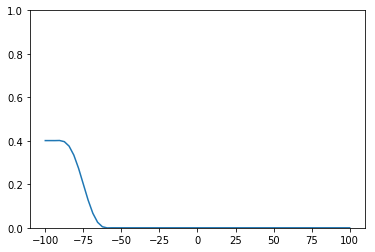

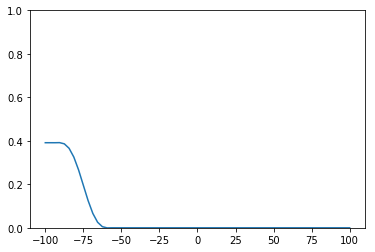

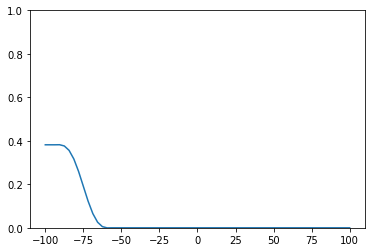

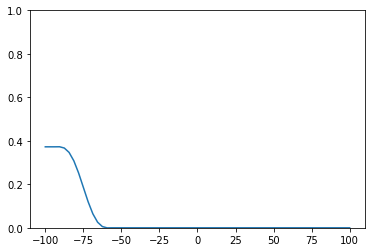

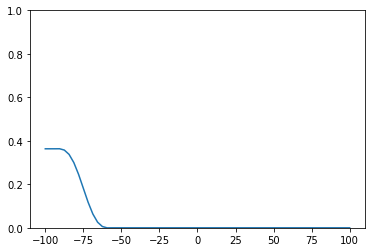

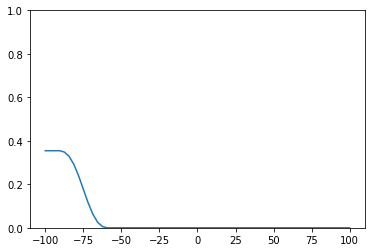

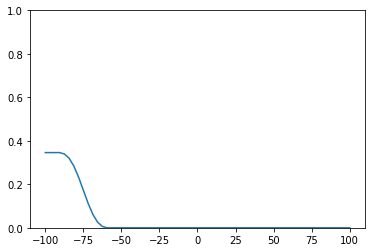

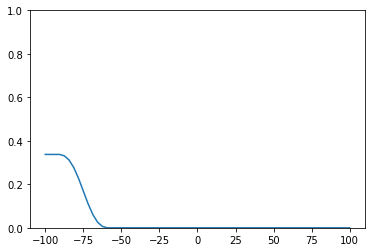

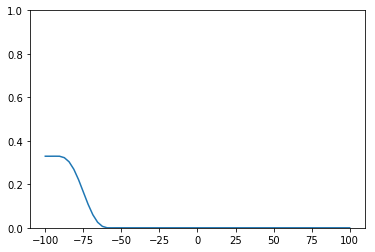

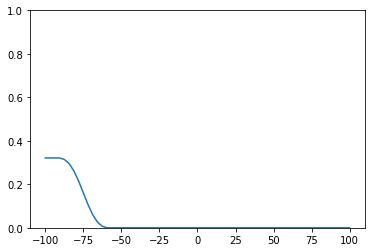

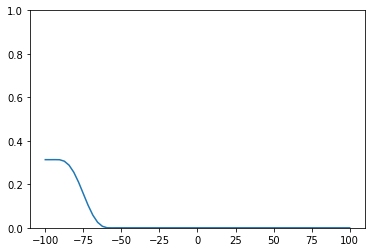

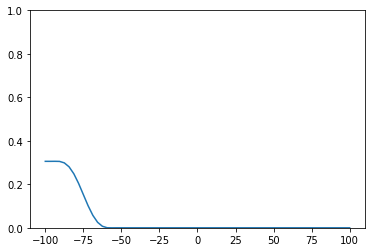

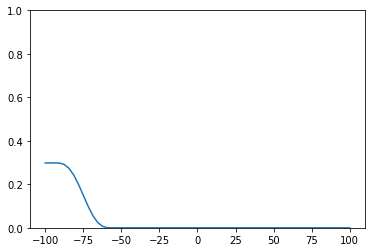

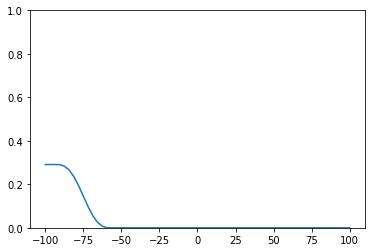

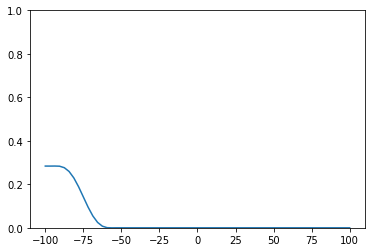

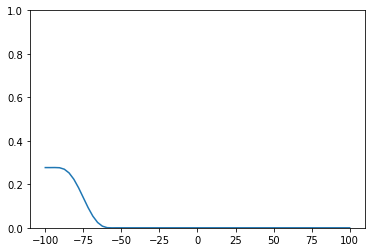

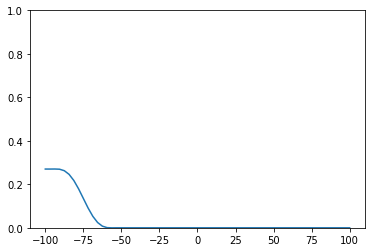

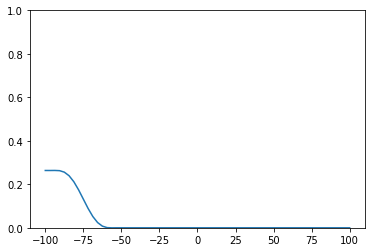

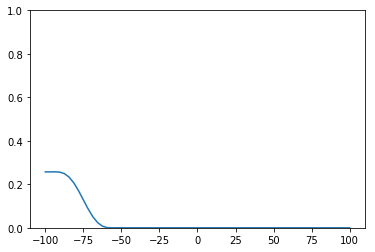

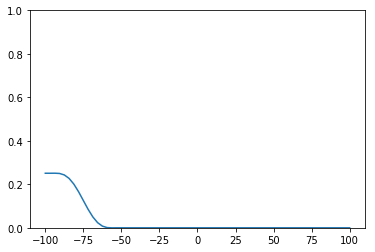

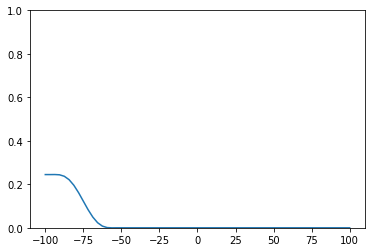

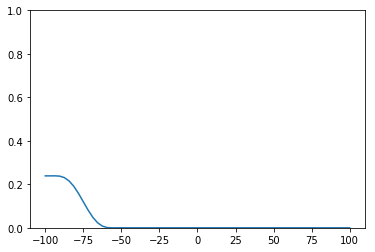

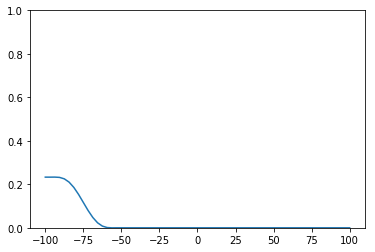

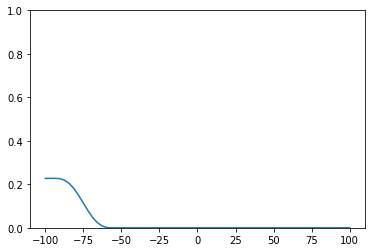

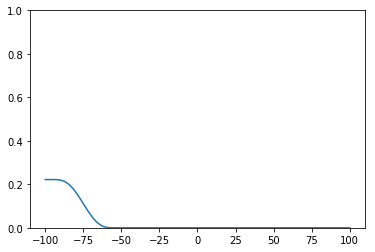

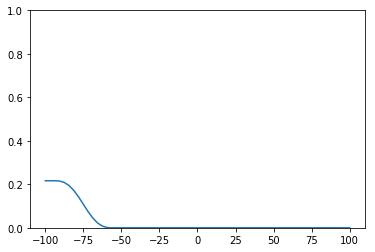

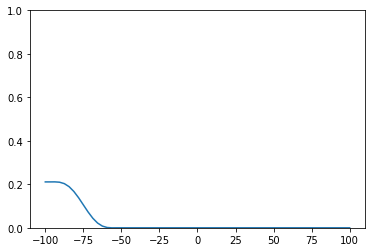

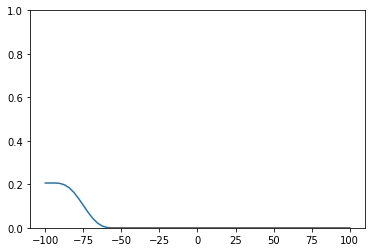

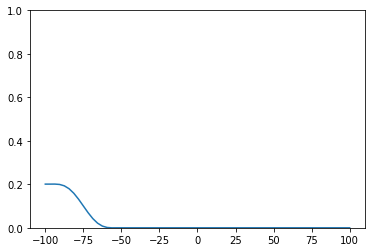

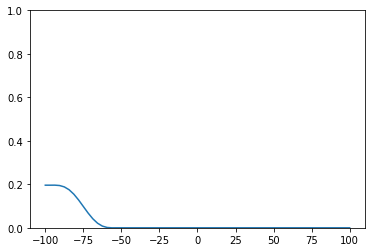

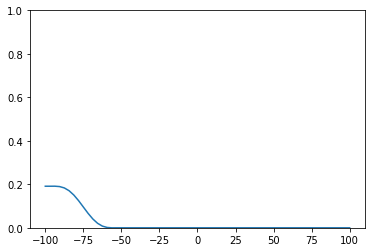

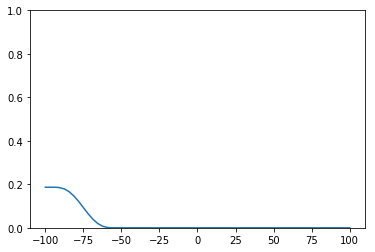

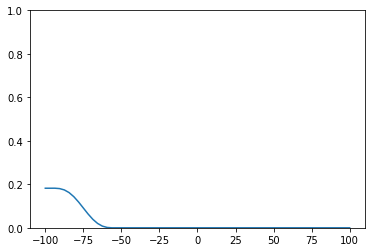

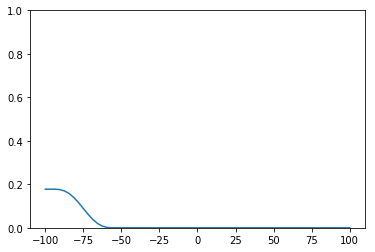

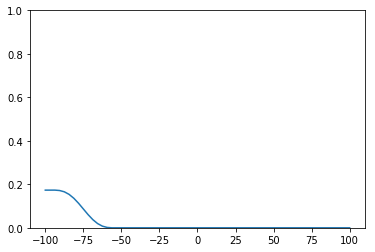

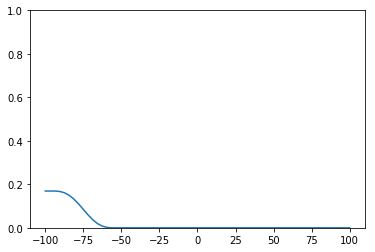

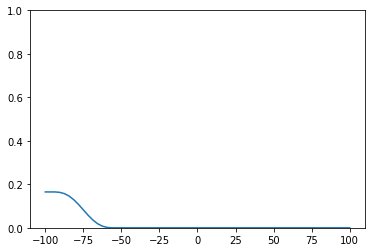

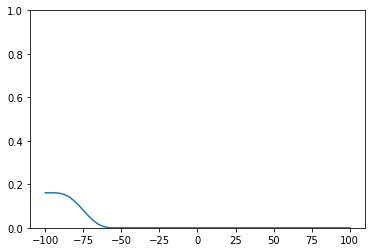

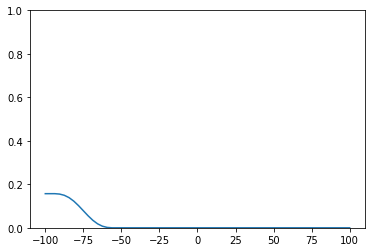

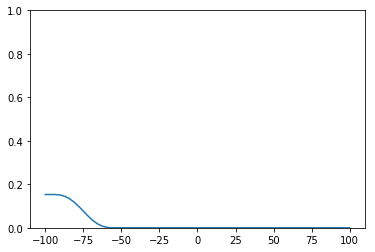

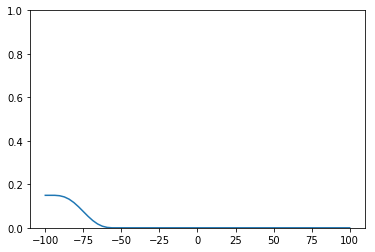

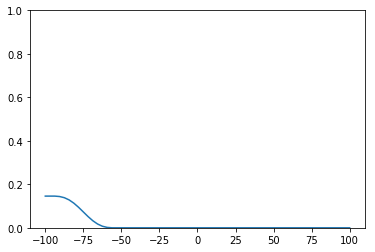

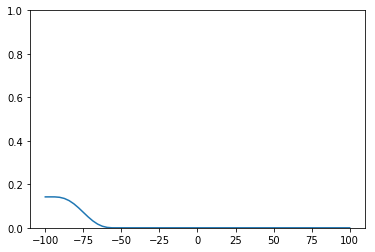

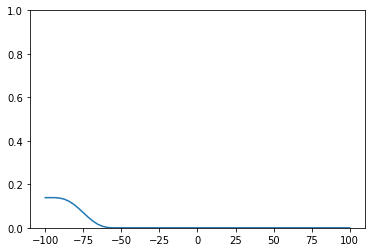

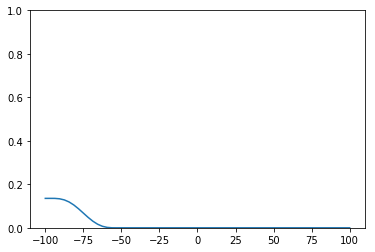

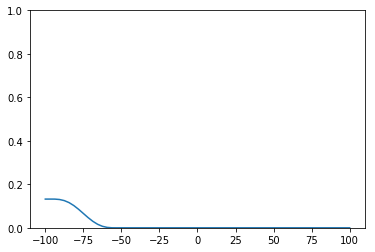

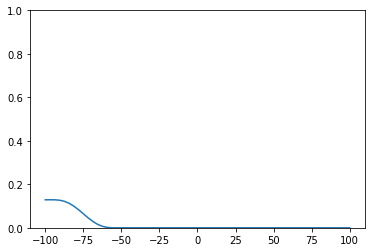

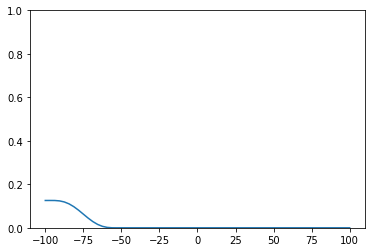

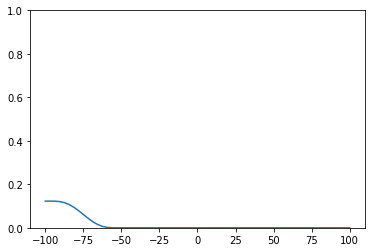

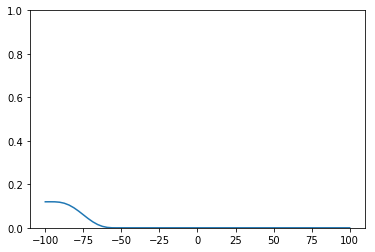

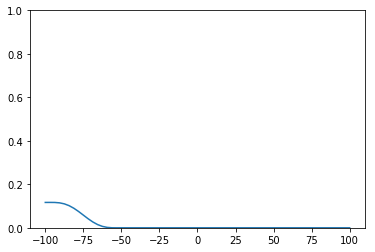

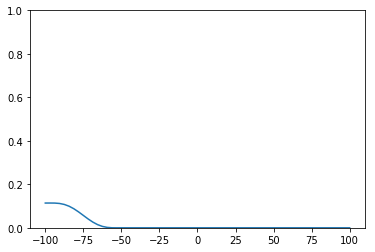

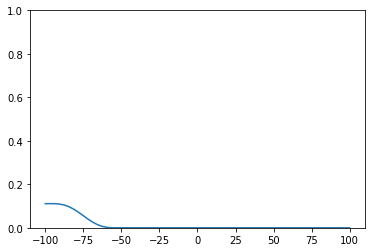

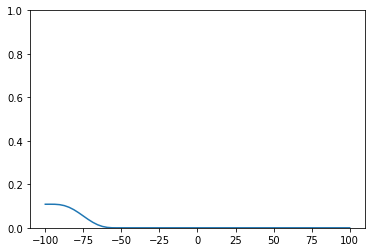

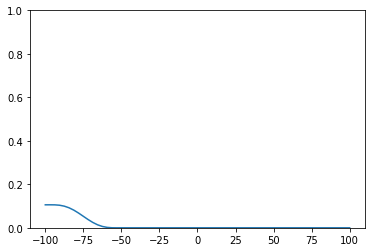

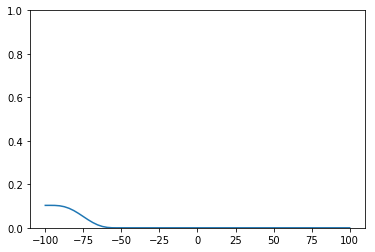

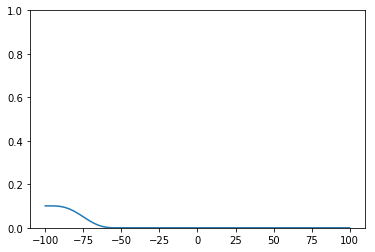

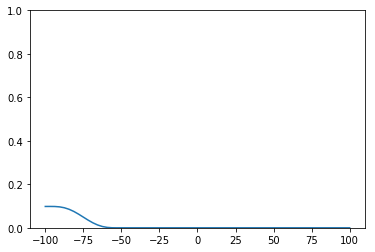

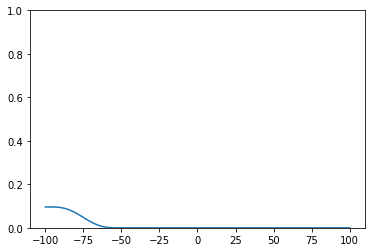

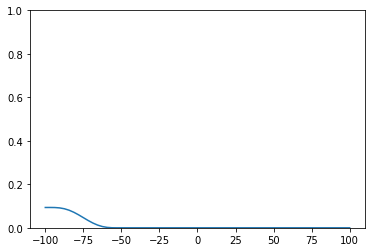

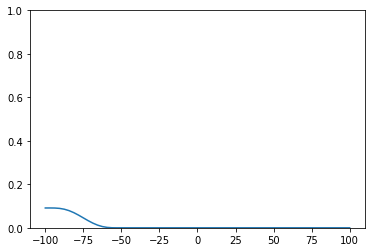

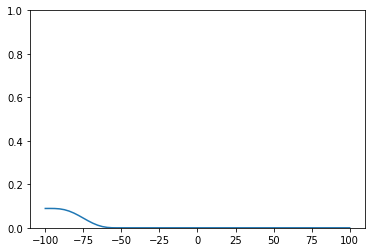

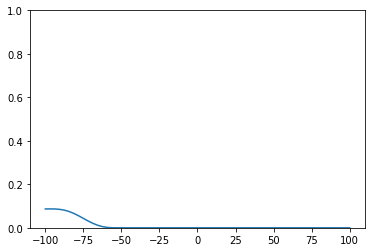

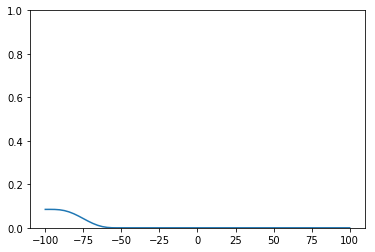

In [30]:
%matplotlib inline
from fenics import *
parameters['plotting_backend'] = 'matplotlib'
import pylab

#model parameters
D = Constant(1.)      #diffusion coeff
a = Constant(1.)      #reaction term scaling
alpha = Constant(0.1) #"threshold" value

#time parameters
dt = 2.5
tstop = 250.0
t = 0.0

# Domain and solution space
L = 100.
N = 64
domain = IntervalMesh(N, -L, L)
V = FunctionSpace(domain, "Lagrange", 1)

# cubic reaction term
def f_cubic(u):
    return a*u*(1-u)*(u-alpha)


# cubic reaction term
def nu_nonlin(u):
    n = 4
    return 0.5*inner(grad(u), grad(u))**(1./(2*(n-1)))

# linear reaction term
def f_linear(u):
    return -0.01*u

# Nonlinear variational formulation
q = TestFunction(V)
u = Function(V)
u0 = Function(V)

#F1 = (u-u0)/dt*q*dx + Constant(1)*inner(D*grad(u), grad(q))*dx - f_linear(u)*q*dx

F = (u-u0)/dt*q*dx + inner(D*grad(u), grad(q))*dx - f_linear(u)*q*dx

# initial value
u.interpolate(Expression("1./2.*(1-tanh(sqrt(a/(8*D))*(x[0]-x0)))", \
                         a=a, alpha=alpha,D=D, x0=-L*0.75, degree=3))

plot(u)
pylab.show()

# Iterate
while t<tstop:
    # Update previous solution
    u0.assign(u)

    solve(F1==0, u)
    #solve(F2==0, u)
    t += dt
    #print(t, "Min:", u.vector().min(), "Max:", u.vector().max())
    p = plot(u)
    p[0].axes.set_aspect('auto')
    p[0].axes.set_ylim([0, 1])
    pylab.show()
